# Dataset 2: Heart Disease Data

**Environment setup**

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import missingno as msno

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

# model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate

# models
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

**Load the Dataset**

In [2]:
heart_diease_df = pd.read_csv("heart_data.csv")
heart_diease_df.head(5)

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
heart_diease_df.describe().T.style.background_gradient(cmap = 'YlGnBu')

,count,mean,std,min,25%,50%,75%,max
index,70000.000000,34999.500000,20207.403759,0.000000,17499.750000,34999.500000,52499.250000,69999.000000
id,70000.000000,49972.419900,28851.302323,0.000000,25006.750000,50001.500000,74889.250000,99999.000000
age,70000.000000,19468.865814,2467.251667,10798.000000,17664.000000,19703.000000,21327.000000,23713.000000
gender,70000.000000,1.349571,0.476838,1.000000,1.000000,1.000000,2.000000,2.000000
height,70000.000000,164.359229,8.210126,55.000000,159.000000,165.000000,170.000000,250.000000
weight,70000.000000,74.205690,14.395757,10.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,70000.000000,128.817286,154.011419,-150.000000,120.000000,120.000000,140.000000,16020.000000
ap_lo,70000.000000,96.630414,188.472530,-70.000000,80.000000,80.000000,90.000000,11000.000000
cholesterol,70000.000000,1.366871,0.680250,1.000000,1.000000,1.000000,2.000000,3.000000
gluc,70000.000000,1.226457,0.572270,1.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
heart_diease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


**Check the missing valuse**

<AxesSubplot:>

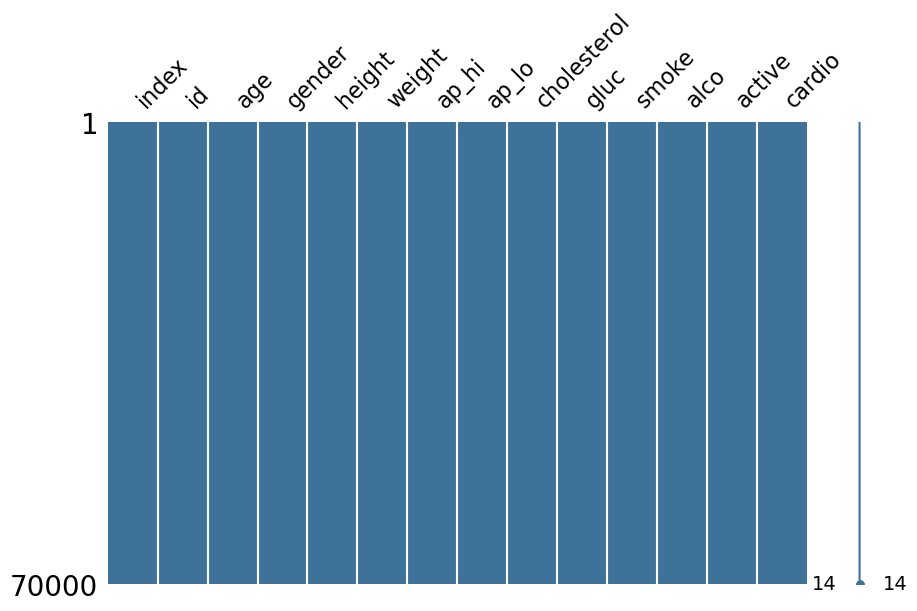

In [5]:
msno.matrix(heart_diease_df, figsize=(10, 6), color=(0.25, 0.45, 0.6))

**Print the unique values count**

In [6]:
for col in heart_diease_df.columns:
    unique_values = heart_diease_df[col].nunique()
    print('{} -->'.format(col), unique_values)
    print('---------------------')

index --> 70000
---------------------
id --> 70000
---------------------
age --> 8076
---------------------
gender --> 2
---------------------
height --> 109
---------------------
weight --> 287
---------------------
ap_hi --> 153
---------------------
ap_lo --> 157
---------------------
cholesterol --> 3
---------------------
gluc --> 3
---------------------
smoke --> 2
---------------------
alco --> 2
---------------------
active --> 2
---------------------
cardio --> 2
---------------------


In [7]:
heart_diease_df.drop(['index'],axis=1,inplace=True)
heart_diease_df.drop(['id'],axis=1,inplace=True)

**Feature Engineering**

In [8]:
ab=[]
for x in heart_diease_df["age"]:
    x1=x//365
    ab.append(x1)

In [9]:
heart_diease_df.insert(2,"Age",ab)
heart_diease_df.drop(['age'],axis=1,inplace=True)

## Data Visualization

**Plot the encountered caridio attack**

Text(0.5, 1.0, 'Person encountered Cardio attack or not')

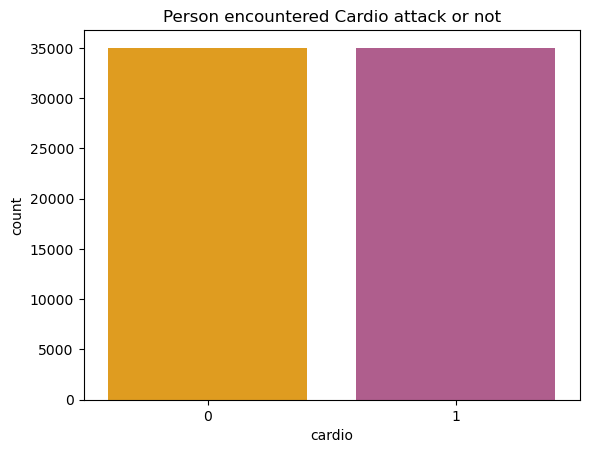

In [10]:
cols=["#ffa600","#bc5090"]
sns.countplot(x=heart_diease_df["cardio"],palette= cols)
plt.title("Person encountered Cardio attack or not")

**Plot Age Vs. Cardio attack**

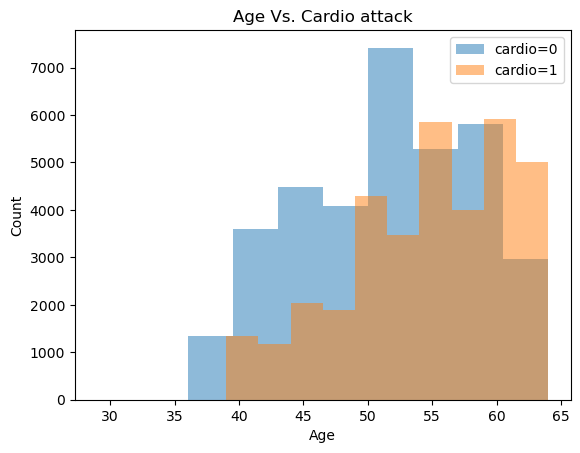

In [11]:
plt.hist(heart_diease_df.loc[heart_diease_df['cardio'] == 0, 'Age'], alpha=0.5, label='cardio=0')
plt.hist(heart_diease_df.loc[heart_diease_df['cardio'] == 1, 'Age'], alpha=0.5, label='cardio=1')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Age Vs. Cardio attack")
plt.legend()
plt.show()

**Correlation Matrix**

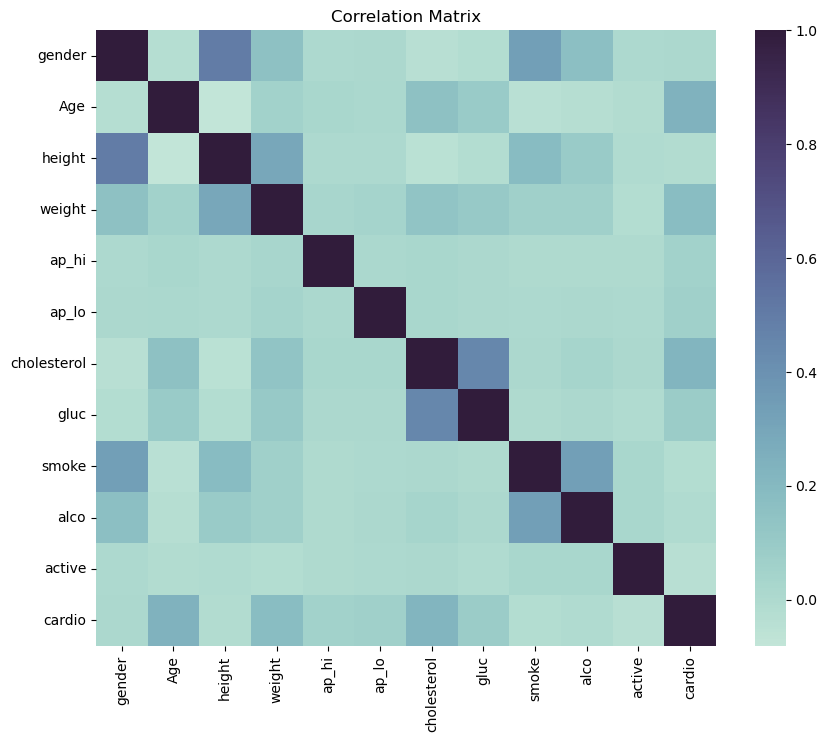

In [12]:
# Calculate the correlation matrix
corr = heart_diease_df.corr()
# Create a custom color map
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, cmap=cmap, ax=ax)

# Set the title and display the plot
ax.set_title('Correlation Matrix')
plt.show()

**Viloin Plot**

Text(0.5, 1.0, 'Violin Plot of Heart Disease DataFrame')

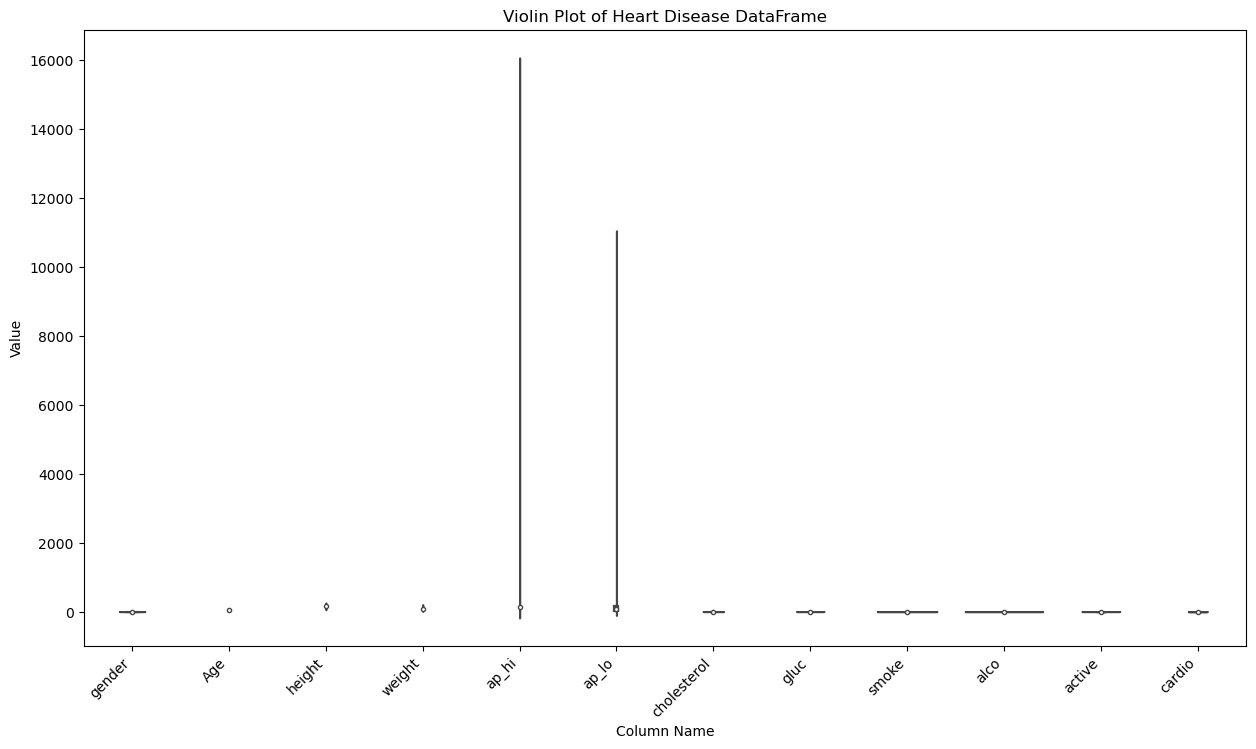

In [13]:
# Create violin plot
fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(data=heart_diease_df, ax=ax)

# Set axis labels and title
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Column Name')
ax.set_ylabel('Value')
ax.set_title('Violin Plot of Heart Disease DataFrame')

**Remove Outliers**

In [14]:
import numpy as np

# Compute z-scores for each column in the dataset
z_scores = np.abs((heart_diease_df - heart_diease_df.mean()) / heart_diease_df.std())

# Remove rows where any column has a z-score greater than 3
heart_diease_df = heart_diease_df[(z_scores < 3).all(axis=1)]

In [15]:
scikit_heart_diease_df = heart_diease_df
pycart_heart_diease_df = heart_diease_df

## Scikit Learn

**Scale the data**

In [16]:
# define columns to scale
columns_to_scale = ['Age', 'height', 'weight', 'ap_hi', 'ap_lo']

# create scaler object
scaler = StandardScaler()

# fit and transform the data for the selected columns
scikit_heart_diease_df[columns_to_scale] = scaler.fit_transform(scikit_heart_diease_df[columns_to_scale])

**split into X and y**

In [17]:
# split into X and y
X = scikit_heart_diease_df.drop('cardio', axis=1)
y = scikit_heart_diease_df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

**Model Preformance and evalution-**

In [18]:
classifiers = {
    "XGBoost": {
        "model": xgb.XGBClassifier(),
        "hyperparameters": {
            'max_depth': [3, 5, 7],
            'learning_rate': [0.1, 0.2, 0.3],
            'n_estimators': [100, 200, 300]
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(random_state=0),
        "hyperparameters": {
            "penalty": ["l2", "elasticnet"],
            "C": [0.25, 0.5, 0.75, 1, 1.25, 0.1],
            "max_iter": [50, 100, 150],
            "solver": ["lbfgs", "liblinear"]
        }
    }
}

Model name : XGBoost

Best parameters: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1}
              precision    recall  f1-score   support

           0       0.72      0.79      0.76      8608
           1       0.75      0.67      0.71      8102

    accuracy                           0.74     16710
   macro avg       0.74      0.73      0.73     16710
weighted avg       0.74      0.74      0.73     16710



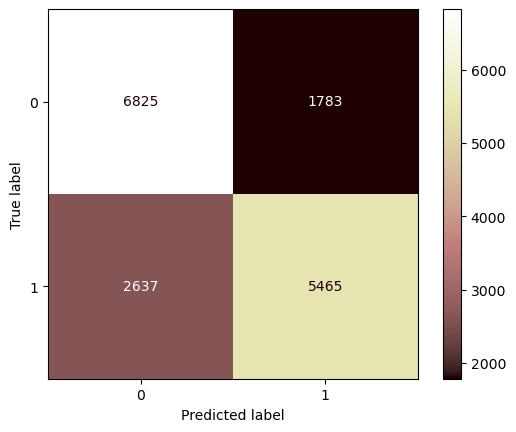

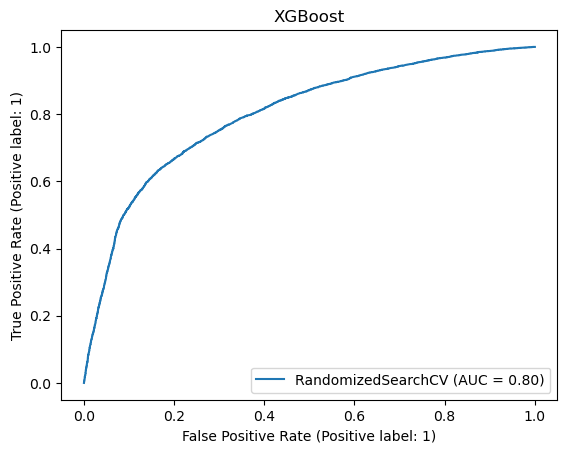

Model name : Logistic Regression

Best parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 50, 'C': 1.25}
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      8608
           1       0.75      0.65      0.70      8102

    accuracy                           0.73     16710
   macro avg       0.73      0.72      0.72     16710
weighted avg       0.73      0.73      0.72     16710



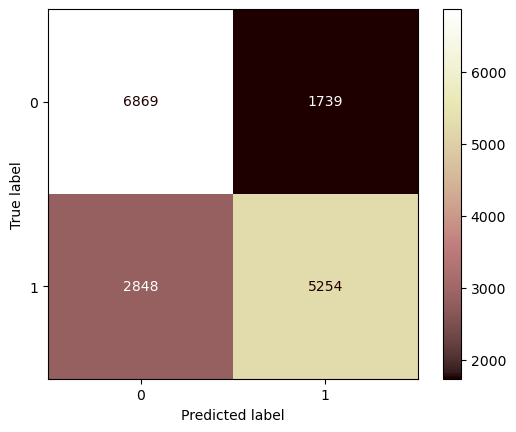

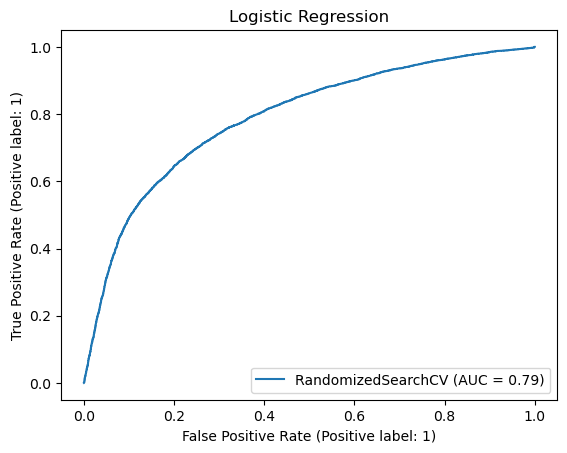

In [19]:
# Perform grid search on each classifier to find the best hyperparameters
best_parameters = {}
for model_name, model_data in classifiers.items():
    print(f"Model name : \033[1m{model_name}\033[0m\n")
    model = model_data["model"]
    hyperparameters = model_data["hyperparameters"]
    grid_search = RandomizedSearchCV(model, hyperparameters, scoring="roc_auc", n_iter=5, n_jobs=-1, random_state=0)
    grid_search.fit(X_train, y_train)
    best_parameters[model_name] = grid_search.best_params_
    print(f"Best parameters: {best_parameters[model_name]}")
    print(classification_report(y_test, grid_search.predict(X_test)))
    plot_confusion_matrix(grid_search, X_test, y_test, cmap="pink")
    plot_roc_curve(grid_search, X_test, y_test)
    plt.title(model_name)
    plt.show()

## PyCaret

In [20]:
from pycaret.classification import *

**Setup PyCaret**

In [21]:
# setup PyCaret
exp_reg = setup(data = pycart_heart_diease_df, 
                target='cardio',
                normalize=True,
                transformation=True)

,Description,Value
0,Session id,1137
1,Target,cardio
2,Target type,Binary
3,Original data shape,"(55699, 12)"
4,Transformed data shape,"(55699, 12)"
5,Transformed train set shape,"(38989, 12)"
6,Transformed test set shape,"(16710, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


**XGBoost-**

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7343,0.8065,0.6684,0.7555,0.7093,0.4663,0.4693
1,0.7225,0.7859,0.6563,0.7418,0.6964,0.4426,0.4454
2,0.7225,0.7878,0.6531,0.7435,0.6954,0.4425,0.4457
3,0.7366,0.7890,0.6783,0.7537,0.7140,0.4711,0.4734
4,0.7210,0.7870,0.6693,0.7321,0.6993,0.4400,0.4415
5,0.7210,0.7846,0.6598,0.7370,0.6963,0.4396,0.4420
6,0.7235,0.7913,0.6577,0.7425,0.6975,0.4446,0.4474
7,0.7374,0.8012,0.6836,0.7520,0.7162,0.4728,0.4747
8,0.7238,0.7875,0.6751,0.7338,0.7032,0.4457,0.4471


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

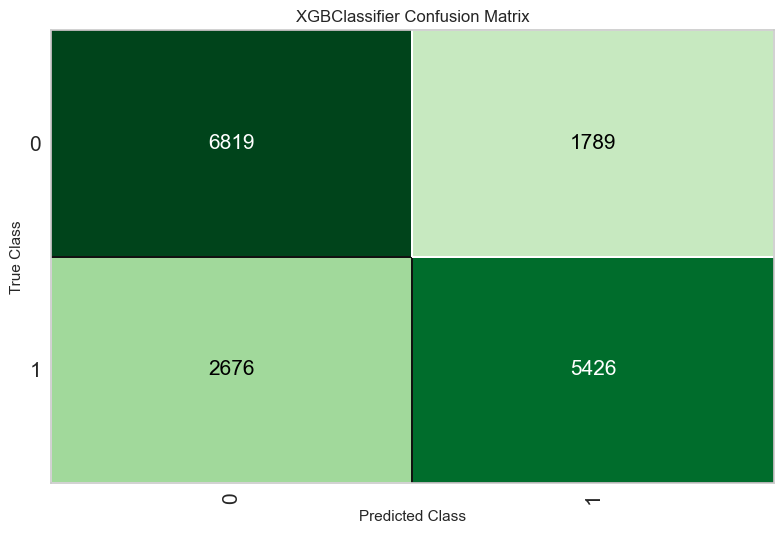

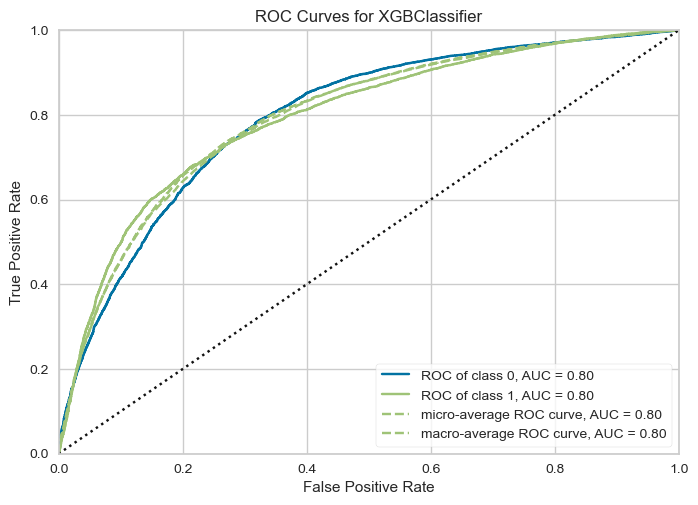

In [22]:
xgboost = create_model('xgboost')
plot_model(xgboost, plot='confusion_matrix')
plot_model(xgboost, plot='auc')

**Linear Regression-**

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7387,0.8001,0.6674,0.7639,0.7124,0.4749,0.4785
1,0.7189,0.7806,0.6568,0.7353,0.6939,0.4355,0.4379
2,0.7161,0.7777,0.6383,0.7405,0.6856,0.4294,0.4333
3,0.7310,0.7861,0.6730,0.7469,0.7080,0.4598,0.4620
4,0.7210,0.7809,0.6614,0.7362,0.6968,0.4397,0.4419
5,0.7125,0.7766,0.6466,0.7296,0.6856,0.4225,0.4251
6,0.7215,0.7823,0.6556,0.7401,0.6953,0.4405,0.4433
7,0.7338,0.7898,0.6746,0.7509,0.7107,0.4655,0.4677
8,0.7222,0.7790,0.6656,0.7361,0.6991,0.4424,0.4443


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

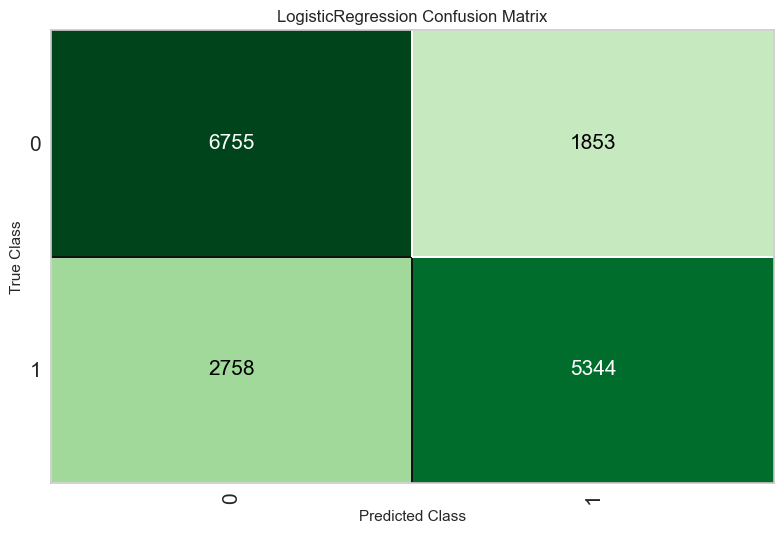

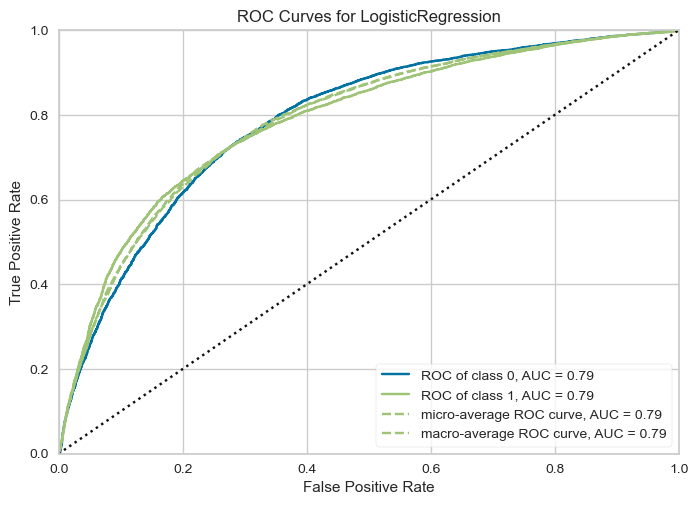

In [23]:
# Create a Linear Regression model
lr = create_model('lr')
plot_model(lr, plot='confusion_matrix')
plot_model(lr, plot='auc')

**Compare models**

In [24]:
# compare models
compare_models(include=['xgboost','lr'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7265,0.7908,0.6654,0.7435,0.7022,0.4507,0.4531,1.6470
lr,Logistic Regression,0.7238,0.7839,0.6592,0.7424,0.6983,0.4454,0.4481,1.8950


Processing:   0%|          | 0/13 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)